In [ ]:
#Build a Convolutional Neural Network (CNN) to classify images in the FashionMNIST dataset.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader
from sklearn.metrics import accuracy_score
from torchvision import transforms,datasets

In [5]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
train_dataset=datasets.FashionMNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=datasets.FashionMNIST(root='./data',train=False,download=True,transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [36]:
class FashionClassifier(nn.Module):
    def __init__(self,hidden_size,output_size ):
        super().__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
        self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
        self.relu=nn.ReLU()
        self.max_pool=nn.MaxPool2d(kernel_size=2,stride=1)
        self.flattened_size=64*27*27
        self.fc1=nn.Linear(self.flattened_size,hidden_size)
        self.fc2=nn.Linear(hidden_size,output_size)
    def forward(self,X):
        X=self.conv1(X)
        X=self.relu(X)
        X=self.conv2(X)
        X=self.relu(X)
        X=self.max_pool(X)
        X = X.view(X.size(0), -1)
        X=self.fc1(X)
        self.relu(X)
        X=self.fc2(X)
        return X


In [37]:
hidden_size=28
output_size=10
model=FashionClassifier(hidden_size,output_size)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

In [39]:
model.train()
no_epochs=15
for epochs in range(no_epochs):
    running_loss=0
    for inputs,labels in train_loader:
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss
    average_loss=running_loss/len(train_loader)
    print(f'epoch {epochs+1},loss:{average_loss}')

epoch 1,loss:0.2681026756763458
epoch 2,loss:0.2706592381000519
epoch 3,loss:0.2653646469116211
epoch 4,loss:0.2637213170528412
epoch 5,loss:0.2586193084716797
epoch 6,loss:0.25520044565200806
epoch 7,loss:0.2599172294139862
epoch 8,loss:0.25191351771354675
epoch 9,loss:0.2602192163467407
epoch 10,loss:0.2535873353481293
epoch 11,loss:0.24610906839370728
epoch 12,loss:0.24868537485599518
epoch 13,loss:0.2538103461265564
epoch 14,loss:0.2457130402326584
epoch 15,loss:0.24853253364562988


In [40]:
model.eval()
correct=0
total=0
with torch.no_grad():
    for inputs,labels in test_loader:
        outputs=model(inputs)
        _,predicted=torch.max(outputs.data,1)
        correct+=(predicted==labels).sum().item()
        total+=labels.size(0)
    accuracy=correct/total*100
    print(f"test accuracy:{accuracy}%.")  
          


test accuracy:87.5%.


In [50]:
labels_map = {
    0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress",
    4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
}


In [53]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# Load your custom image
img = Image.open("C:/Users/LENOVO/Downloads/fashionmnistbagtotest.png").convert('L')
# Resize to 28x28 and apply same transform as used in training
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((28, 28)),   # Resize to match input shape
    transforms.ToTensor(),         # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Same normalization if used
])

img_tensor = transform(img)  # Shape: [1, 28, 28]
img_tensor = img_tensor.unsqueeze(0)  # Shape: [1, 1, 28, 28] → batch size of 1


In [54]:
model.eval()

with torch.no_grad():
    output = model(img_tensor)
    predicted = torch.argmax(output, 1)
    predicted_label = labels_map[predicted.item()]
    print(f"Predicted Label: {predicted_label}")


Predicted Label: Bag


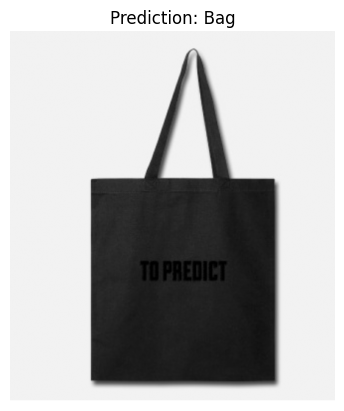

In [55]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {predicted_label}")
plt.axis('off')
plt.show()
